# Q9

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Using monthly excess returns for the five industry portfolios and the market portfolio:

Calculate and report the risk premiums and β coefficients for the five industry portfolios.

Estimate the intercept and slope coefficients for the security market line (SML), and plot the SML with risk premium on the vertical axis and β on the horizontal axis. This plot must cover the range from β = 0 to 1.6 on the horizontal axis.

Also plot the positions of the five industry portfolios and the market portfolio, on the same graph as the SML.

Briefly explain (in words) the economic interpretation for the intercept and slope coefficients of the SML.

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [7]:
Industry_Portfolio=pd.read_excel("Exam-Industry.xlsx",index_col=0)
Industry_Portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
190101,-1.34,4.20,3.01,-0.71,1.92
190102,2.89,4.87,3.45,3.33,2.63
190103,1.89,1.81,-0.83,2.29,-0.86
190104,4.36,2.58,3.16,6.37,1.11
190105,0.92,-2.55,-1.13,1.96,-2.40
...,...,...,...,...,...
190608,1.71,0.80,4.36,2.85,2.59
190609,-3.28,-2.84,-6.16,-6.01,-2.26
190610,8.63,6.01,6.74,2.25,7.25


In [8]:
Market_Portfolio=pd.read_excel("Exam–Market.xlsx",index_col=0)
Market_Portfolio

,Market
Date,
190101,1.99
190102,3.49
190103,0.46
190104,2.90
190105,-1.27
...,...
190608,2.91
190609,-4.37
190610,6.65


In [9]:
Merged_Portfolio = Industry_Portfolio.merge(Market_Portfolio,how='inner',left_index=True, right_index=True)
Merged_Portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other,Market
Date,,,,,,
190101,-1.34,4.20,3.01,-0.71,1.92,1.99
190102,2.89,4.87,3.45,3.33,2.63,3.49
190103,1.89,1.81,-0.83,2.29,-0.86,0.46
190104,4.36,2.58,3.16,6.37,1.11,2.90
190105,0.92,-2.55,-1.13,1.96,-2.40,-1.27
...,...,...,...,...,...,...
190608,1.71,0.80,4.36,2.85,2.59,2.91
190609,-3.28,-2.84,-6.16,-6.01,-2.26,-4.37
190610,8.63,6.01,6.74,2.25,7.25,6.65


# Risk premium for industry portfolios

In [12]:
Summary = pd.DataFrame({"Mean":Industry_Portfolio.mean()})
Summary

,Mean
Cnsmr,1.449167
Manuf,1.108889
HiTec,1.672361
Hlth,1.452083
Other,1.366389


In [10]:
# For regression

# Initialize the Market_model DataFrame with appropriate indices and columns
Market_model=pd.DataFrame(index=["Intercept","Slope"],columns=Industry_Portfolio.columns)

# Loop through each column of Excess_Return_Portfolio (except the last one, which is the market portfolio)
for column in range(Market_model.shape[1]):
    y = Merged_Portfolio.iloc[:,column]                       # Dependent variable (industry portfolio)
    x = Merged_Portfolio.iloc[:,-1]                           # Independent variable (market portfolio, assumed to be the last column)
    
    # Perform linear regression between the column and the market portfolio
    slope, intercept, r, p, std_err = stats.linregress(x, y)

    # Store the intercept and slope in the Market_model DataFrame
    Market_model.iloc[0,column]=intercept
    Market_model.iloc[1,column]=slope

Market_model

,Cnsmr,Manuf,HiTec,Hlth,Other
Intercept,0.328254,-0.347052,0.244585,0.384346,-0.234594
Slope,0.803442,1.043581,1.023394,0.765327,1.147543


In [11]:
Market_model.T

,Intercept,Slope
Cnsmr,0.328254,0.803442
Manuf,-0.347052,1.043581
HiTec,0.244585,1.023394
Hlth,0.384346,0.765327
Other,-0.234594,1.147543


# Beta coefficients for industry portfolio

In [13]:
Market_model.T["Slope"]

Cnsmr    0.803442
Manuf    1.043581
HiTec    1.023394
Hlth     0.765327
Other    1.147543
Name: Slope, dtype: object

In [ ]:
Mean_monthly_return = Merged_Portfolio.mean(axis=0)
Mean_monthly_return

Cnsmr     1.449167
Manuf     1.108889
HiTec     1.672361
Hlth      1.452083
Other     1.366389
Market    1.395139
dtype: float64

In [15]:
Security_Market_Line = pd.DataFrame(data=Mean_monthly_return)
Security_Market_Line.rename(mapper={0:"Mean_monthly_return"},axis=1,inplace=True) 
Security_Market_Line = Security_Market_Line.merge(Market_model.T,how="outer",left_index=True,right_index=True)
Security_Market_Line

,Mean_monthly_return,Intercept,Slope
Cnsmr,1.449167,0.328254,0.803442
HiTec,1.672361,0.244585,1.023394
Hlth,1.452083,0.384346,0.765327
Manuf,1.108889,-0.347052,1.043581
Market,1.395139,NaN,NaN
Other,1.366389,-0.234594,1.147543


In [16]:
# Fill in the intercept and slope for market portfolio

Security_Market_Line.loc["Market","Intercept"]=0
Security_Market_Line.loc["Market","Slope"]=1

In [17]:
# Make sure the columns are numbers

Security_Market_Line['Intercept'] = pd.to_numeric(Security_Market_Line['Intercept'])
Security_Market_Line['Slope'] = pd.to_numeric(Security_Market_Line['Slope'])

In [18]:
# Remember that the Intercept is Alpha and the Slope is Beta
# The Mean_monthly_return is the original monthly return (NOT EXCESS RETURN)

Security_Market_Line

,Mean_monthly_return,Intercept,Slope
Cnsmr,1.449167,0.328254,0.803442
HiTec,1.672361,0.244585,1.023394
Hlth,1.452083,0.384346,0.765327
Manuf,1.108889,-0.347052,1.043581
Market,1.395139,0.000000,1.000000
Other,1.366389,-0.234594,1.147543


In [19]:
# Doing a regression using Beta on mean_monthly_returns

slope, intercept, r, p, std_err = stats.linregress(Security_Market_Line["Slope"], Security_Market_Line["Mean_monthly_return"])

In [20]:
slope

-0.2867620887985608

In [21]:
intercept

1.683742554293583

In [22]:
# Draw the SML

SML = intercept + slope * np.linspace(0, 2.1, 100)
SML 

array([1.68374255, 1.67765972, 1.67157689, 1.66549406, 1.65941123,
       1.65332839, 1.64724556, 1.64116273, 1.6350799 , 1.62899706,
       1.62291423, 1.6168314 , 1.61074857, 1.60466574, 1.5985829 ,
       1.59250007, 1.58641724, 1.58033441, 1.57425157, 1.56816874,
       1.56208591, 1.55600308, 1.54992025, 1.54383741, 1.53775458,
       1.53167175, 1.52558892, 1.51950609, 1.51342325, 1.50734042,
       1.50125759, 1.49517476, 1.48909192, 1.48300909, 1.47692626,
       1.47084343, 1.4647606 , 1.45867776, 1.45259493, 1.4465121 ,
       1.44042927, 1.43434643, 1.4282636 , 1.42218077, 1.41609794,
       1.41001511, 1.40393227, 1.39784944, 1.39176661, 1.38568378,
       1.37960094, 1.37351811, 1.36743528, 1.36135245, 1.35526962,
       1.34918678, 1.34310395, 1.33702112, 1.33093829, 1.32485546,
       1.31877262, 1.31268979, 1.30660696, 1.30052413, 1.29444129,
       1.28835846, 1.28227563, 1.2761928 , 1.27010997, 1.26402713,
       1.2579443 , 1.25186147, 1.24577864, 1.2396958 , 1.23361

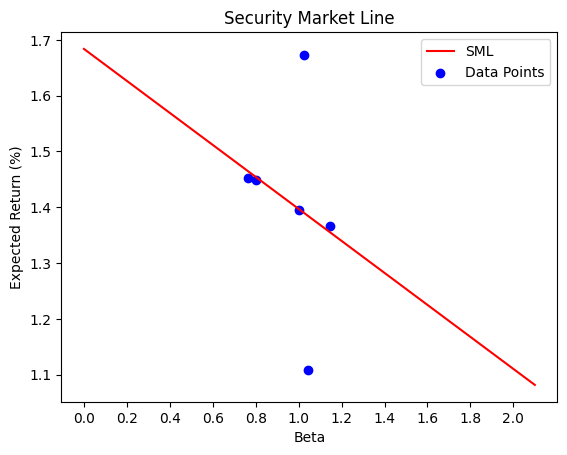

In [23]:
# Create the figure and axis objects
fig, ax = plt.subplots(1, 1)

# Plot the SML line using the generated beta_values
ax.plot(np.linspace(0, 2.1, 100), SML, label="SML", color="red")

# Scatter plot of the actual data points
ax.scatter(Security_Market_Line["Slope"], Security_Market_Line["Mean_monthly_return"], color='blue', label="Data Points")

# Set x-ticks in increments of 0.2
plt.xticks(np.arange(0, 2.1, 0.2))

# Optional: Set y-ticks if needed 
# plt.yticks(np.arange(0, 2.1, 0.1))

# Label the axes
plt.xlabel('Beta')
plt.ylabel('Expected Return (%)')

# Add title and legend
plt.title('Security Market Line')
plt.legend()

# Display the plot
plt.show()

Economic interpretation for the intercept and slope coefficients of the SML.

The Security Market Line (SML) is a graphical representation of the Capital Asset Pricing Model (CAPM). It depicts the linear relationship between an asset’s expected return and its beta.  According to CAPM, the intercept of the SML should be the risk-free rate, as an asset with zero beta has zero exposure to systematic risk, and thus should only earn the risk-free rate of return. The slope of the SML should be the excess market return. According to the CAPM, assets with a higher beta are more exposed to market risk, and investors would demand a higher expected return to compensate for taking on that additional risk.

All assets that lie on the SML have the same Treynor ratio, meaning they offer the same ratio of risk premium to systematic risk (beta). In equilibrium, such assets are fairly priced, providing a return that is consistent with their level of market risk.